In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
vocab_size = 100000
embedding_dim = 32
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [16]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-09-16 04:07:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-09-16 04:07:10 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [17]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [18]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          3200000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 3,200,817
Trainable params: 3,200,817
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 17s - loss: 0.6857 - accuracy: 0.5603 - val_loss: 0.6842 - val_accuracy: 0.5633
Epoch 2/30
625/625 - 16s - loss: 0.6829 - accuracy: 0.5603 - val_loss: 0.6777 - val_accuracy: 0.5633
Epoch 3/30
625/625 - 17s - loss: 0.6510 - accuracy: 0.6153 - val_loss: 0.5981 - val_accuracy: 0.6558
Epoch 4/30
625/625 - 16s - loss: 0.5009 - accuracy: 0.8025 - val_loss: 0.4586 - val_accuracy: 0.7931
Epoch 5/30
625/625 - 16s - loss: 0.3868 - accuracy: 0.8492 - val_loss: 0.4080 - val_accuracy: 0.8207
Epoch 6/30
625/625 - 16s - loss: 0.3359 - accuracy: 0.8680 - val_loss: 0.3765 - val_accuracy: 0.8427
Epoch 7/30
625/625 - 16s - loss: 0.3034 - accuracy: 0.8823 - val_loss: 0.3637 - val_accuracy: 0.8501
Epoch 8/30
625/625 - 16s - loss: 0.2752 - accuracy: 0.8943 - val_loss: 0.3723 - val_accuracy: 0.8328
Epoch 9/30
625/625 - 16s - loss: 0.2514 - accuracy: 0.9037 - val_loss: 0.3485 - val_accuracy: 0.8559
Epoch 10/30
625/625 - 16s - loss: 0.2310 - accuracy: 0.9140 - val_loss: 0.3441 - val_accura

{'loss': [0.6856735944747925, 0.6828787326812744, 0.6510095000267029, 0.5008787512779236, 0.386806845664978, 0.3359453082084656, 0.3033517599105835, 0.2751508951187134, 0.2514159083366394, 0.2309580147266388, 0.21848173439502716, 0.19479785859584808, 0.1810205578804016, 0.16659630835056305, 0.15308044850826263, 0.1426289975643158, 0.12816129624843597, 0.12039542198181152, 0.11147189885377884, 0.10109325498342514, 0.09294940531253815, 0.08655311912298203, 0.08139128237962723, 0.07257361710071564, 0.06705418974161148, 0.06083330512046814, 0.05636420473456383, 0.05518575385212898, 0.049959003925323486, 0.0453081913292408], 'accuracy': [0.5602999925613403, 0.5602999925613403, 0.6152999997138977, 0.8024500012397766, 0.8491500020027161, 0.8679999709129333, 0.8822500109672546, 0.894349992275238, 0.9036999940872192, 0.9139500260353088, 0.9175500273704529, 0.9304500222206116, 0.9327999949455261, 0.9401999711990356, 0.9455999732017517, 0.9500499963760376, 0.9567499756813049, 0.9596499800682068, 

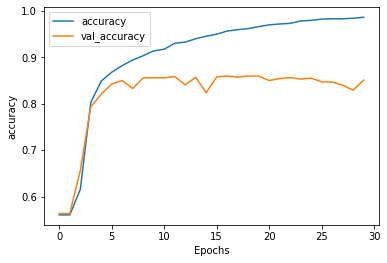

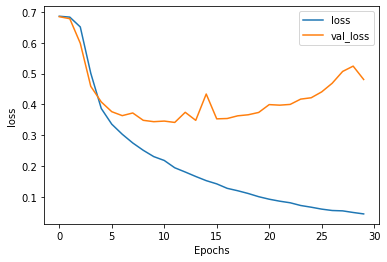

In [24]:
import matplotlib.pyplot as plt
print(history.history)


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[1])
print(labels[1])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
the 'roseanne' revival catches up to our thorny political mood, for better and worse
0


In [16]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))